Course-2-Assignment 3


#### Task 1:

* Download the data (*sonar.all-data*) from the *Sonar, Mines vs. Rocks Data Set*: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)
* Substitute the categories M and R of the last column for integers.
* Find the best parameters on the validation set using gridsearch (min. 2 parameters) for one model.
* Plot a heatmap of the parameters. 
* Plot a ROC curve.

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from IPython.display import display


from matplotlib import rc
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 25}
rc('font', **font) 

plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['lines.linewidth'] = 5.0
plt.rcParams['lines.markersize'] = 15.0

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

Q.Download the data (sonar.all-data) from the Sonar, Mines vs. Rocks Data Set: 
#https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

In [188]:
df_sonar_all = pd.read_csv("sonar.all-data") 

Q. Substitute the categories M and R of the last column for integers.

In [189]:
#df_sonar_all.R

In [190]:
#rename column R by target and replace the value R by 0 , M by 1
df_sonar_all.rename(columns={"R": "target"}, inplace=True)
replace_list = {"target": {"R" : 0, "M": 1}}
df_sonar_all.replace(replace_list, inplace= True)

Q.Find the best parameters on the validation set using gridsearch (min. 2 parameters) for one model.

In [191]:
X = df_sonar_all.iloc[:,:-1].values #data values
y = df_sonar_all["target"].values # target/lebel to be predicted

In [192]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,100],#,1000],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}\n".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.81
Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: 0.89

Best estimator:
SVC(C=100, gamma=0.1)


Q. Plot a heatmap of the parameters.

In [193]:
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)

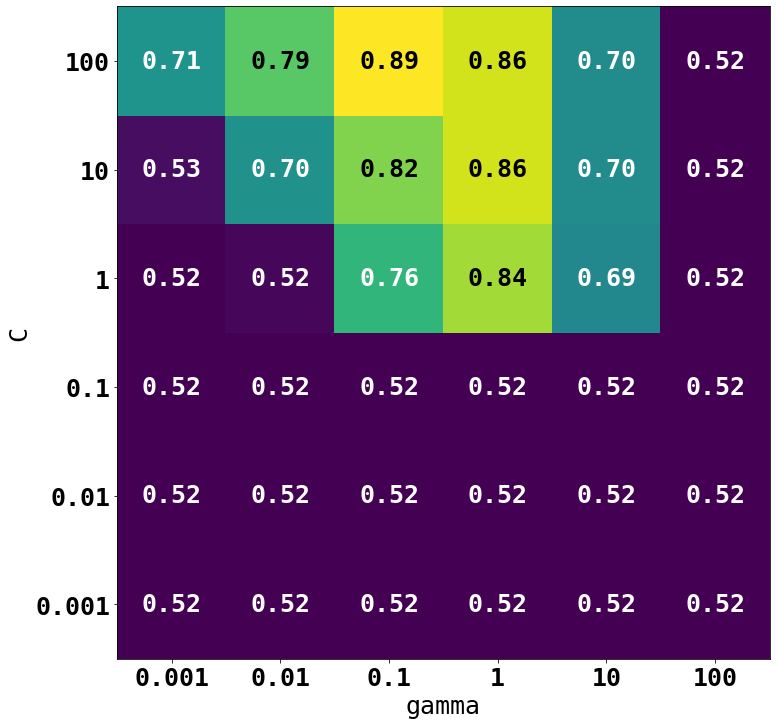

In [194]:
scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

Q. Plot a ROC curve

In [202]:
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 25}
rc('font', **font) 
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams['lines.markersize'] = 20

In [203]:
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier

svc = SVC(gamma=.05).fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)


RandomForestClassifier(max_features=2, random_state=0)

In [204]:
from sklearn.metrics import roc_curve

def plot_roc_curve():
    fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

    close_zero = np.argmin(np.abs(thresholds))

    plt.plot(fpr, tpr, label="ROC Curve SVC")
    plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")
    plt.xlabel("FPR")
    plt.ylabel("TPR (recall)")
    plt.plot(fpr[close_zero], tpr[close_zero], 'o', 
    label="threshold zero SVC", fillstyle="none", c='k', mew=2)
    close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
    plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^',
    label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)
    plt.legend(loc=4)

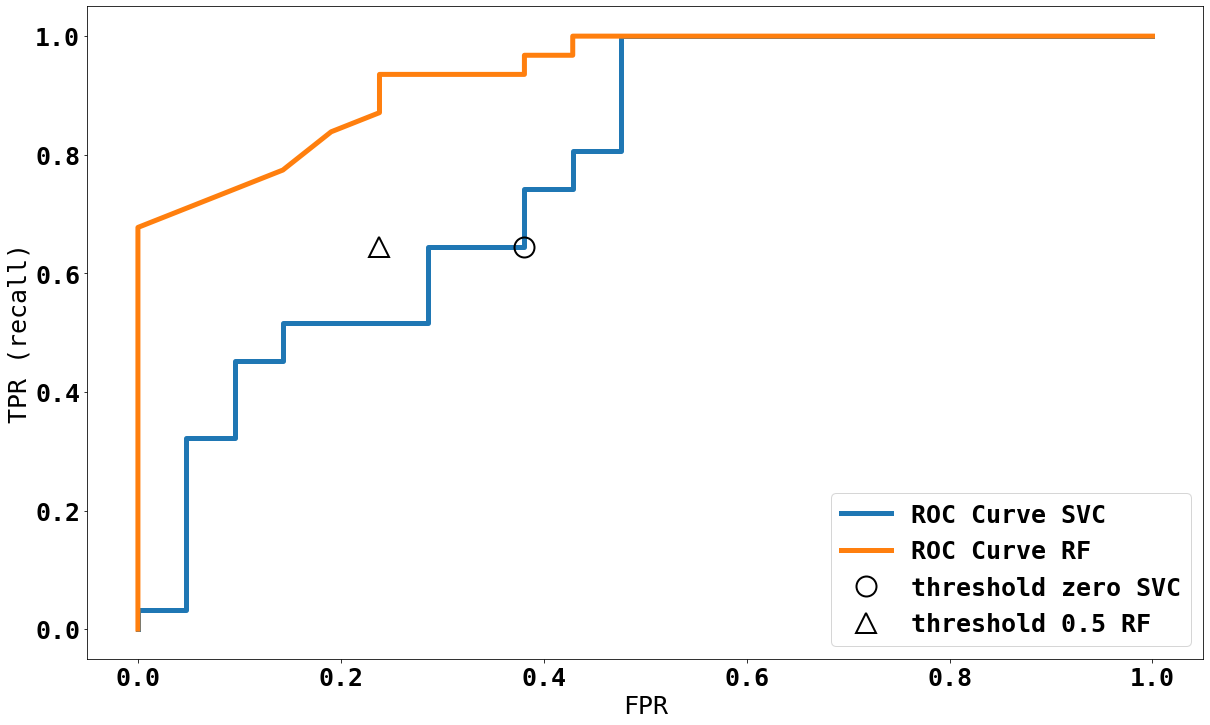

In [205]:
plot_roc_curve()

In [200]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.934
AUC for SVC: 0.771


#### Tasks 2:

Data Set Information:

2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. 
The CTGs were also classified by three expert obstetricians and a consensus classification label assigned to each of them. 
Classification was both with respect to a morphologic pattern (A, B, C. ...) and to a fetal state (N, S, P). 
Therefore the dataset can be used either for 10-class or 3-class experiments.

* Download the data from the *Cardiotocography Data Set*: https://archive.ics.uci.edu/ml/datasets/Cardiotocography
* Find the best two models by creating a complete pipeline. One model should predict the *morphologic pattern* and the other the 
*fetal state*. Use the best combination of parameters and techniques. This is an exercise similar to real life.
So use all that you have learned here!

In [4]:
#Download data
url="https://archive.ics.uci.edu/ml/machine-learning-databases/00193/CTG.xls"
df_data=pd.read_excel(url, sheet_name="Data", header=1)

In [6]:
#df_data

In [7]:
#remove the last 3 empity rows
df_data = df_data.drop(df_data.tail(3).index)
#Columns in our dataframe.
df_data.columns

Index(['b', 'e', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'DR', 'Unnamed: 9', 'LB',
       'AC.1', 'FM.1', 'UC.1', 'DL.1', 'DS.1', 'DP.1', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency', 'Unnamed: 31', 'A', 'B', 'C', 'D',
       'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'Unnamed: 42', 'CLASS',
       'Unnamed: 44', 'NSP'],
      dtype='object')

In [8]:
#Our 21 features are
columns = ['LB', 'AC.1', 'FM.1', 'UC.1', 'DL.1', 'DS.1', 'DP.1', 'ASTV',
           'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros',
           'Mode', 'Mean', 'Median', 'Variance', 'Tendency']

features = df_data[columns]
features.head()

,LB,AC.1,FM.1,UC.1,DL.1,DS.1,DP.1,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
0,120.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.002561,0.0,0.007682,0.002561,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [9]:
#create a new dataframe to store our labels, the NSP column, which contains our desired classifications.

labels = df_data['NSP']
labels.value_counts()

1.0    1655
2.0     295
3.0     176
Name: NSP, dtype: int64

# We can see that our dataset is imbalanced, with class 1 having a significantly higher number of samples

In [16]:
X = features.iloc[:,1:].values
y = labels.values

#split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)


In [17]:
from imblearn.over_sampling import ADASYN
from sklearn.svm import LinearSVC
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

In [18]:
#to reduce thdimensionality of dataset use PCA  
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
sampler = ADASYN()
X_resampled, y_resampled = sampler.fit_sample(X_train, y_train)
clf = make_pipeline(sampler, pca, LinearSVC(C=1000, max_iter=100000))
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

C:\Users\tamra\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [19]:

print("Test-set score: {:.2f}".format(clf.score(X_test, y_test)))

Test-set score: 0.40


In [21]:
#Adaptive Synthetic (ADASYN) sampling approach 

ada = ADASYN()
X_resampled, y_resampled = ada.fit_sample(X_train, y_train)
X_resampled, y_resampled = ada.fit_sample(X_train, y_train)
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
               'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                }

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_resampled, y_resampled)

print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.96
Test set score: 0.92
Best parameters: {'svm__C': 100, 'svm__gamma': 10}
